In [18]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import shapely

In [19]:
city = "Chicago"
tags = {'amenity': "school"}
gdf = ox.geometries_from_place(city, tags)
gdf = gdf.to_crs(epsg=3395)



/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: DeprecationWarning: An exception was ignored while fe

<AxesSubplot:>

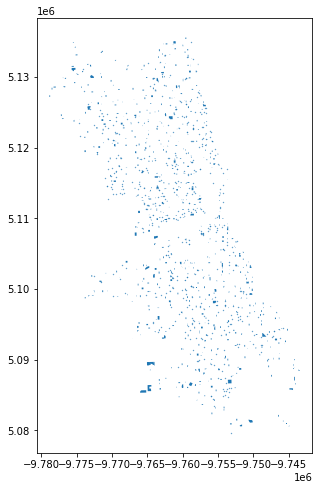

In [20]:
gdf.plot(markersize=.1, figsize=(8,8))

/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out


(-9780663.712197287, -9741649.667106926, 5076827.604406969, 5138328.101386662)

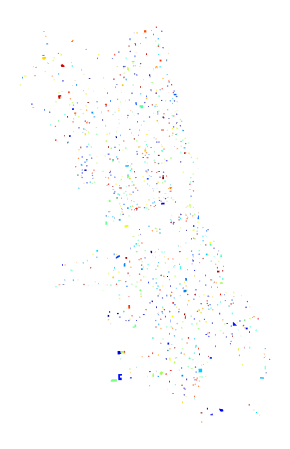

In [21]:
ax = gdf.plot(markersize=.1, figsize=(12, 8), column='name', cmap='jet')
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(gdf.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')

In [22]:
# total area for the grid
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=30
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = 'EPSG:3395'
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  result[:] = values
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out


(-9780663.712197287, -9741649.667106926, 5076827.604406969, 5138328.101386662)

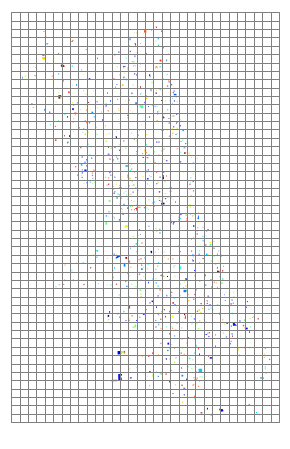

In [23]:
ax = gdf.plot(markersize=.1, figsize=(12, 8), column='name', cmap='jet')
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [24]:
merged = gpd.sjoin(gdf, cell, how='left', op='within')

In [25]:
# make a simple count variable that we can sum
merged['n_tags']=1
# Compute stats per grid cell -- aggregate to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'n_tags'] = dissolve.n_tags.values

/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeErr

/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out


(-9780663.712197289, -9741649.667106919, 5076785.696444928, 5139208.168589517)

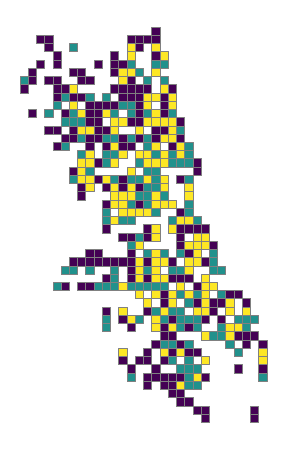

In [26]:
ax = cell.plot(column='n_tags', figsize=(12, 8), cmap='viridis', vmax=3, edgecolor="grey")
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(cell.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')

In [27]:
city = "Los Angeles"
tags = {'amenity': "restaurant"}
gdf = ox.geometries_from_place(city, tags)
gdf = gdf.to_crs(epsg=3395)

/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: DeprecationWarning: An exception was ignored while fe

In [28]:
# total area for the grid
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=30
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = 'EPSG:3395'
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  result[:] = values
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out


In [29]:
merged = gpd.sjoin(gdf, cell, how='left', op='within')

In [30]:
# make a simple count variable that we can sum
merged['n_tags']=1
# Compute stats per grid cell -- aggregate to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'n_tags'] = dissolve.n_tags.values

/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'GeometryCollection'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `Attrib

/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out


(-13209608.651633682,
 -13150335.566847889,
 3961666.021958353,
 4050575.6491370653)

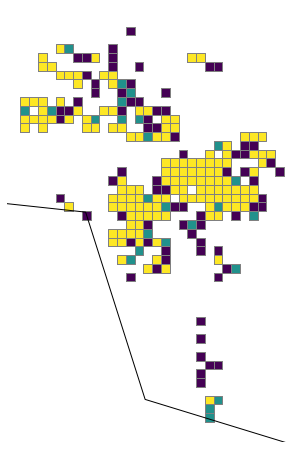

In [31]:
ax = cell.plot(column='n_tags', figsize=(12, 8), cmap='viridis', vmax=3, edgecolor="grey")
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(cell.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')